In [1]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.parse import urlparse

In [2]:
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Read csv file
reviews = pd.read_csv("review_sample.csv")
reviews.head()

,Unnamed: 0,review,url
0,0,Tobin was a great host! Space was nice and cle...,https://www.airbnb.com/rooms/13571814?location...
1,1,Tobin's condo is very clean and comfortable. H...,https://www.airbnb.com/rooms/13571814?location...
2,2,Tobin’s place lived up to its billing. It’s do...,https://www.airbnb.com/rooms/13571814?location...
3,3,This place was so cute and you felt at home as...,https://www.airbnb.com/rooms/13571814?location...
4,4,There were four of us who stayed at Tobin's pl...,https://www.airbnb.com/rooms/13571814?location...


In [4]:
review = reviews["review"]


In [5]:
ids = []
for url in reviews["url"]:
    parse_object = urlparse(url)
    test = parse_object.path.split("/")
    ids.append(test[2])

In [6]:
compound = []
pos = []
neu = []
neg = []
#  taking each review and running the sentiment analyzer on it
for r in review:
    c = analyzer.polarity_scores(r)["compound"]
    p = analyzer.polarity_scores(r)["pos"]
    ne = analyzer.polarity_scores(r)["neu"]
    ng = analyzer.polarity_scores(r)["neg"]
    compound.append(c)
    pos.append(p)
    neu.append(ne)
    neg.append(ng)    

In [7]:
df = pd.DataFrame({"Review": review,
                   "Compound": compound,
                   "Pos": pos,
                   "Neg": neg,
                   "Neu": neu,
                   "url": reviews["url"],
                   "ID": ids
                  })
df

,Compound,ID,Neg,Neu,Pos,Review,url
0,0.7133,13571814,0.027,0.829,0.144,Tobin was a great host! Space was nice and cle...,https://www.airbnb.com/rooms/13571814?location...
1,0.8729,13571814,0.000,0.829,0.171,Tobin's condo is very clean and comfortable. H...,https://www.airbnb.com/rooms/13571814?location...
2,0.9657,13571814,0.000,0.678,0.322,Tobin’s place lived up to its billing. It’s do...,https://www.airbnb.com/rooms/13571814?location...
3,0.9480,13571814,0.000,0.759,0.241,This place was so cute and you felt at home as...,https://www.airbnb.com/rooms/13571814?location...
4,0.8895,13571814,0.000,0.803,0.197,There were four of us who stayed at Tobin's pl...,https://www.airbnb.com/rooms/13571814?location...
5,0.9641,13571814,0.034,0.650,0.316,"Great location off South Lamar area, lots of r...",https://www.airbnb.com/rooms/13571814?location...
6,0.9458,13571814,0.000,0.478,0.522,Wonderful apartment! Perfect for me and my fri...,https://www.airbnb.com/rooms/13571814?location...
7,0.9561,46929,0.047,0.640,0.313,I cannot say enough positive things about Susa...,https://www.airbnb.com/rooms/46929?location=Co...
8,0.4019,46929,0.000,0.946,0.054,"This is a quiet, clean and stylish Zen-like oa...",https://www.airbnb.com/rooms/46929?location=Co...
9,0.9523,46929,0.000,0.603,0.397,Privacy and comfort are our favorite features ...,https://www.airbnb.com/rooms/46929?location=Co...


In [8]:
good = df["Pos"].mean()
bad = df["Neg"].mean()
neutral = df["Neu"].mean()
comp = df["Compound"].mean()

In [9]:
x = df.groupby(["ID"])['Compound'].mean()
type(x)

pandas.core.series.Series

In [10]:
values = x.to_frame()
values = values.reset_index()
values

,ID,Compound
0,13571814,0.899900
1,16067140,0.896044
2,321636,0.840283
3,4279079,0.820771
4,46929,0.844267
5,917932,0.843027


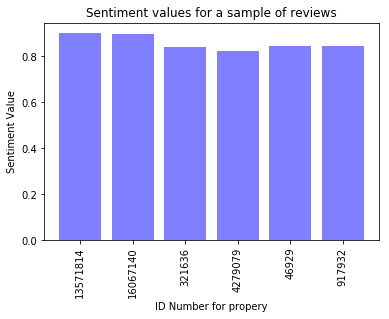

In [11]:
id_num = values["ID"]
x_axis = np.arange(len(id_num))
y_axis = values["Compound"]
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, id_num, rotation='vertical')

# plt.xticks(x, labels, rotation='vertical')

# # # Sets the x limits of the current chart
# plt.xlim(-0.75, len(x_axis)-0.25)

# # # Sets the y limits of the current chart
# plt.ylim(0, max(bars_in_cities)+1)

# # Give our chart some labels and a tile
plt.title("Sentiment values for a sample of reviews")
plt.xlabel("ID Number for propery")
plt.ylabel("Sentiment Value")

plt.savefig('sentiment_reviews_bar.png')

In [17]:
import spacy
from spacy import displacy
from IPython.core.display import display, HTML


In [18]:
text = review[15]

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

html = displacy.render(doc, style='ent', jupyter=True)
display(HTML(html))

<IPython.core.display.HTML object>

In [19]:
# all_rev = open("all_reviews.txt", "r")

In [20]:
# content = all_rev.read()
# len(content)

In [16]:
# https://spacy.io/usage/

for text in review:
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)

    html = displacy.render(doc, style='ent')
    display(HTML(html))

/anaconda3/envs/PythonData/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/anaconda3/envs/PythonData/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/anaconda3/envs/PythonData/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/anaconda3/envs/PythonData/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/anaconda3/envs/PythonData/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/anaconda3/envs/PythonData/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/anaconda3/envs/PythonData/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


/anaconda3/envs/PythonData/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)
